In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib as pl
import os

In [4]:
labels = {
    "fake": "fake",
    "bias": "fake",
    "junksci": "fake",
    "hate": "fake",
    "reliable": "reliable"
}

def add_labels(df) -> pd.DataFrame:
    """Add custom labels based on 'type' column to dataframe."""
    df = df.rename(columns={"type":"orig_type"})
    
    def lookup_labels(data) -> str:
        return labels[data["orig_type"]]
    df["type"] = df.apply(lookup_labels, axis=1)

    new_index = ["id", "domain", "orig_type","type", "scraped_at", "words", "content_len", "mean_word_len", "median_word_len", "split"]
    df = df.reindex(columns= new_index)
    return df

In [3]:
df_src = pd.read_csv(pl.Path(os.path.abspath('')).parent.parent.resolve() / "data_files/processed_csv/summarized_corpus_valset2_groups.csv")

In [130]:
df = df_src.copy()
df

,id,domain,orig_type,scraped_at,type,words,content_len,mean_word_len,median_word_len,split
0,9684638.0,nytimes.com,reliable,2018-02-11 00:48:01.619836,reliable,"{'petti': 3, 'complet': 1, 'pass': 5, 'cotton'...",3322,5.026408,4.0,6
1,8486467.0,nytimes.com,reliable,2018-02-11 00:36:08.462112,reliable,"{'outset': 1, 'first': 2, 'match': 2, 'pilot':...",1264,5.458128,5.0,7
2,8699302.0,nytimes.com,reliable,2018-02-11 00:38:14.808471,reliable,"{'baton': 1, 'roug': 1, 'man': 2, 'forc': 1, '...",467,4.376471,4.0,8
3,8997443.0,nytimes.com,reliable,2018-02-11 00:41:07.513779,reliable,"{'daughter': 1, 'dr': 2, 'paul': 1, 'ny': 3, '...",1001,5.119497,5.0,9
4,1862051.0,pravda.ru,bias,2017-11-10T11:18:44.524042,fake,"{'na': 8, 'ukrain': 1, 'nachali': 1, 'rossiisk...",1820,7.543379,7.0,8
...,...,...,...,...,...,...,...,...,...,...
2774314,9153728.0,nytimes.com,reliable,2018-02-11 00:42:35.664094,reliable,"{'market': 1, 'look': 2, 'direct': 1, 'recent'...",1489,4.968127,4.0,3
2774315,9870712.0,nytimes.com,reliable,2018-02-11 00:49:45.199995,reliable,"{'how': 2, 'think': 1, 'feel': 2, 'prison': 5,...",318,4.096774,3.0,5
2774316,9140554.0,nytimes.com,reliable,2018-02-11 00:42:28.789188,reliable,"{'chart': 2, 'articl': 1, 'wednesday': 1, 'leg...",254,5.243902,4.0,8
2774317,NaN,nytimes.com,reliable,2018-02-11 00:49:52.111090,reliable,"{'hous': 13, 'author': 13, 'resid': 4, 'audien...",6261,4.996098,4.0,5


In [131]:
df.isnull().sum()

id                 1
domain             0
orig_type          0
scraped_at         0
type               0
words              0
content_len        0
mean_word_len      0
median_word_len    0
split              0
dtype: int64

In [132]:
df = df.drop(2774317)
#df.sort_values(by="mean_word_len",ascending=False)


In [177]:
# mean content length
df['content_len'].sum()/len(df['content_len'])

3182.3242825804396

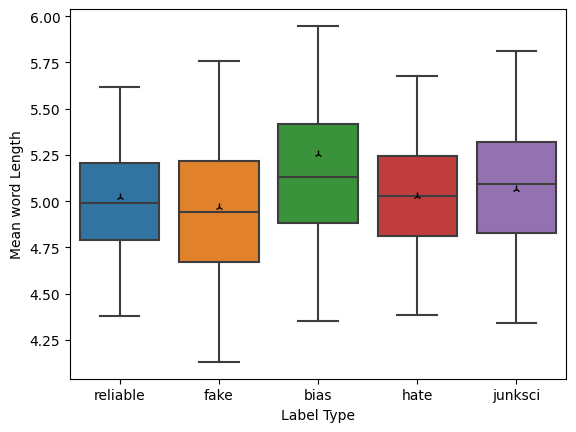

In [135]:
# mean word length by Label type Fake News
import pandas as pd
import seaborn as sns

# Find the order
my_order = ['reliable','fake','bias','hate','junksci']

# create a box plot of 'content_len' by 'orig_type'
sns.boxplot(x='orig_type', y='mean_word_len', data=df, order=my_order, whis = 1, showfliers=False, showmeans=True,
            meanprops={"marker":"2", 
                "markeredgecolor":"black",
                "markersize":"6"})

# add labels and title to the plot
plt.xlabel('Label Type')
plt.ylabel('Mean word Length')
#plt.title('Distribution of Content Length by Mean Word Length')

# show the plot
plt.show()

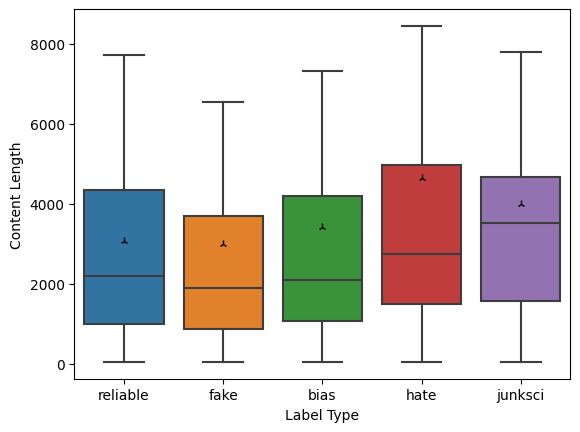

In [136]:
# Content length by Label type in Fake News Corpus
import pandas as pd
import seaborn as sns

# Find the order
my_order = ['reliable','fake','bias','hate','junksci']

# create a box plot of 'content_len' by 'orig_type'
sns.boxplot(x='orig_type', y='content_len', data=df, order=my_order, whis = 1, showfliers=False, showmeans=True,
            meanprops={"marker":"2", 
                "markeredgecolor":"black",
                "markersize":"6"})

# add labels and title to the plot
plt.xlabel('Label Type')
plt.ylabel('Content Length')
#plt.title('Distribution of Content Length by Label Type') # titles/captions are added in 

# show the plot
plt.show()

In [113]:
# print(len(df))
# df = df.rename(columns={"type":"orig_type"})
# df['type'] = df['orig_type']
# update df to only contain duplicates
# print("\n Extracting duplicate rows... This may take up to a minute...")
# df_incl_dups = len(df)
# df = df[df.duplicated(subset=["words","content_len"], keep='first') == True] # does not include "scraped_at" in subset argument, so an article scraped on several occasions will only have the first occurence as non-duplicate
# df_excl_dups = len(df)
# diff = df_incl_dups - df_excl_dups
# print(f"Total duplicates found: {diff}")
# df

In [137]:
df.type.value_counts()

reliable    1438022
fake        1336296
Name: type, dtype: int64

In [138]:
reals = df.type.value_counts()[0]
fakes = df.type.value_counts()[1]
print(f"Fake article percentage: {fakes/(fakes+reals)}")

Fake article percentage: 0.481666485240697


Fake-to-Reliable article ratio for top 1500000 articles: 1.0768949589605556
Fake-to-Reliable article ratio for top 1400000 articles: 1.0771174357688524
Fake-to-Reliable article ratio for top 1300000 articles: 1.07724806176777
Fake-to-Reliable article ratio for top 1200000 articles: 1.0777241994268945
Fake-to-Reliable article ratio for top 1100000 articles: 1.0779652564209126


<Axes: xlabel='type', ylabel='count'>

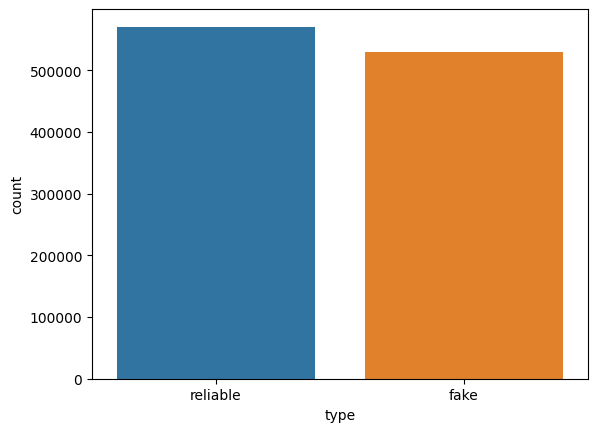

In [8]:
# df reduction to 200.000 articles; approx 1/10th
fakes_list = []
reals_list = []
for i in range(5):
    count = 1_500_000 - i*100000
    df2 = df[:count]
    df2_len = len(df2)
    fakes = df2.type.value_counts()[0]
    reals = df2.type.value_counts()[1]
    
    print(f"Fake-to-Reliable article ratio for top {df2_len} articles: {fakes/reals}")
sns.countplot(data=df2,
              x='type',
              order=df2['type'].value_counts().index)

In [ ]:
## Fake-to-Reliable article ratio for only fake vs. reliable labels (results)

# Fake-to-Realiable article ratio for top 1500000 articles: 1.4397344918277026
# Fake-to-Realiable article ratio for top 1400000 articles: 1.2770855257058558
# Fake-to-Realiable article ratio for top 1300000 articles: 1.1144365595840091
# Fake-to-Realiable article ratio for top 1200000 articles: 1.05065458603265
# Fake-to-Realiable article ratio for top 1100000 articles: 1.2672044750494147
# Fake-to-Realiable article ratio for top 1000000 articles: 1.596195535062919
# Fake-to-Realiable article ratio for top  900000 articles: 2.1559126022603348
# Fake-to-Realiable article ratio for top  800000 articles: 3.3201442928193803
# Fake-to-Realiable article ratio for top  700000 articles: 7.217988001737518
# Fake-to-Realiable article ratio for top  600000 articles: 31.298002906820262
# Fake-to-Realiable article ratio for top  500000 articles: 26.207922947162213
# Fake-to-Realiable article ratio for top  400000 articles: 22.88630120625821
# Fake-to-Realiable article ratio for top  300000 articles: 17.2882223847842
# Fake-to-Realiable article ratio for top  200000 articles: 17.08481779546071
# Fake-to-Realiable article ratio for top  100000 articles: 21.232103156958647

In [ ]:
# Fake-to-Reliable article ratio for large label groups fake=(bias, fake, hate, junksci) vs reliable=(reliable)

# Fake-to-Reliable article ratio for top 1500000 articles: 7.713483243971722
# Fake-to-Reliable article ratio for top 1400000 articles: 18.404826257502044
# Fake-to-Reliable article ratio for top 1300000 articles: 73.2560118809619
# Fake-to-Reliable article ratio for top 1200000 articles: 67.55575868372944
# Fake-to-Reliable article ratio for top 1100000 articles: 65.05813115541676
# Fake-to-Reliable article ratio for top 1000000 articles: 61.77857994852157
# Fake-to-Reliable article ratio for top 900000 articles: 55.857666308673956
# Fake-to-Reliable article ratio for top 800000 articles: 50.20655443896819
# Fake-to-Reliable article ratio for top 700000 articles: 44.31624263611057
# Fake-to-Reliable article ratio for top 600000 articles: 43.923629829290206
# Fake-to-Reliable article ratio for top 500000 articles: 50.26627704296114
# Fake-to-Reliable article ratio for top 400000 articles: 52.10674455655868
# Fake-to-Reliable article ratio for top 300000 articles: 49.55611729019211
# Fake-to-Reliable article ratio for top 200000 articles: 47.33252779120348
# Fake-to-Reliable article ratio for top 100000 articles: 70.99424046076314

In [140]:
# # Shuffling
# df = df.sample(frac=1)
# df.reset_index(inplace=True)
# df.drop(["index"], axis=1, inplace=True)

In [166]:
df3 = df.copy()
df3 = df3[:120000]

In [167]:
import ast
print(type(df3.words[0]))
df3['words'] = df3['words'].apply(ast.literal_eval)
print(type(df3.words[0]))

<class 'str'>
<class 'dict'>


In [169]:
df3['bow_len'] = df3['words'].apply(lambda x: len(x.keys()))


In [170]:
df3['bow_len'].sum() / len(df3['bow_len'])

171.89238333333333

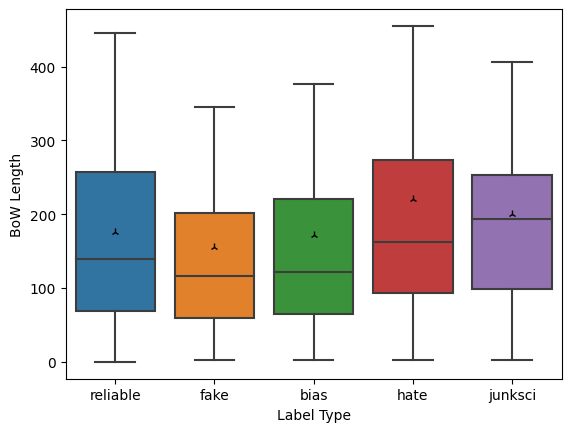

In [173]:
# BAG OF WORDS length by Label type in Fake News Corpus
import pandas as pd
import seaborn as sns

# Find the order
my_order = ['reliable','fake','bias','hate','junksci']

# create a box plot of 'content_len' by 'orig_type'
sns.boxplot(x='orig_type', y='bow_len', data=df3, order=my_order, whis = 1, showfliers=False, showmeans=True,
            meanprops={"marker":"2", 
                "markeredgecolor":"black",
                "markersize":"6"})

# add labels and title to the plot
plt.xlabel('Label Type')
plt.ylabel('BoW Length')
#plt.title('Distribution of Content Length by Mean Word Length')

# show the plot
plt.show()